In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.applications import VGG16

from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [3]:
BATCH_SIZE = 64
EPOCHS = 10

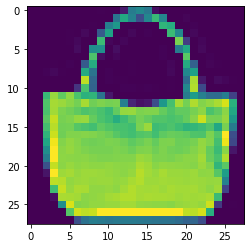

In [4]:
k = x_train[100]
plt.imshow(k)

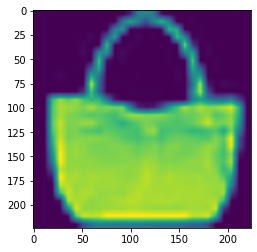

In [5]:
# 224 X 224 사이즈로 resize 합니다.
import cv2
def resize(img):
    return cv2.resize(img, (224, 224))

k = resize(k)
plt.imshow(k)

In [6]:
#모든 img (224, 224) 사이즈로 변경

x_retrain = []
x_retest = []

for i in x_train:
    x_retrain.append(resize(i))
    
for i in x_test:
    x_retest.append(resize(i))

x_retrain = np.array(x_retrain)
x_retest = np.array(x_retest)

print(x_retrain.shape)
print(x_retest.shape)

(60000, 224, 224)
(10000, 224, 224)


In [7]:
#RGB값이 없는 흑백이므로 마지막 차원 3이 아닌 1

x_retrain = x_retrain.reshape(60000, 224, 224, 1)
x_retest = x_retest.reshape(10000, 224, 224, 1)

print(x_retrain.shape)
print(x_retest.shape)

(60000, 224, 224, 1)
(10000, 224, 224, 1)


In [8]:
# 데이터 정규화 ( 0~1 값 갖도록 )

x_retrain = x_retrain.astype('float32') / 255
x_retest = x_retest.astype('float32') / 255

T-shirt/top


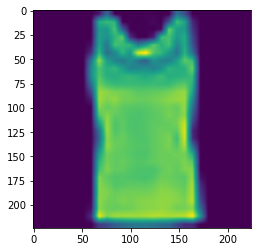

In [9]:
class_name = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankel boot'
]

# 학습 데이터셋 중에서 하나의 이미지 보여주기
img_index = 1005

plt.imshow(x_retrain[img_index])
print(class_name[y_train[img_index]])

In [11]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [12]:
model.trainable=False

In [13]:
model = Sequential([
    model, 
    Flatten(), 
    Dense(64, activation='relu'), 
    Dense(10, 'sigmoid')
])

In [14]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
print(y_train.shape)
print(y_test.shape)

from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


In [16]:
import tensorflow_datasets as tfds

train_data = tf.data.Dataset.from_tensor_slices((x_retrain, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_retest, y_test))

#train_data = train_dataset.batch(BATCH_SIZE).repeat().prefetch(1)
#test_data = test_dataset.batch(BATCH_SIZE).repeat().prefetch(1)

In [17]:
steps_per_epoch= int(len(x_retrain) * 0.8) // BATCH_SIZE + 1
validation_steps= int(len(x_retest) * 0.2) // BATCH_SIZE + 1

print(steps_per_epoch)
print(validation_steps)

751
32


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 16,321,034
Trainable params: 1,606,346
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
################################모델 학습#########################

In [ ]:
transfer_history = model.fit(train_data, 
                             validation_data=(test_data),
                             steps_per_epoch=steps_per_epoch,
                             validation_steps=validation_steps,
                             epochs=20, 
                            )

In [ ]:
import matplotlib.pyplot as plt
plt.plot(transfer_history.history["acc"])
plt.plot(transfer_history.history['val_acc'])
plt.plot(transfer_history.history['loss'])
plt.plot(transfer_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

prob_pred = model.predict(x_test)
prob_label = prob_pred.argmax(axis=-1)
np.savetxt('y_pred.csv', prob_label,fmt='%d')